# Modelo de Leslie

El Modelo de Leslie es una herramienta matemática utilizada para estudiar la dinámica de poblaciones divididas en clases de edad. Específicamente, este modelo se representa mediante una matriz de transición que captura las tasas de natalidad y mortalidad, así como las probabilidades de transición entre las diferentes clases de edad.

En este caso, tenemos tres clases de edad: $1$-niños, $2$-jóvenes y $3$-adultos. $F$ es la tasa de reproducción y las $P$ las probabilidades de transición entre edades. Nota: Los adultos no transita de edad si no se reproducen y producen niños.

$$
L = \begin{bmatrix}
F_1 & F_2 & F_3 \\
P_1 & 0 & 0 \\
0 & P_2 & P_3
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 & 0.5 \\
0.220 & 0 & 0 \\
0 & 0.08 & 1
\end{bmatrix}
$$

Para el vector inicial tenemos 1000 individuos $700$ son niños, $250$ jóvenes y $50$ adultos.

$$
v_0 = \begin{bmatrix}
700 \\
250 \\
50
\end{bmatrix}
$$

Esta función calcula la evolución de la población con una matriz de Leslie

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def C_Leslie(M, v, n):
    # Comprobar si la matriz M es cuadrada.
    if M.shape[0] != M.shape[1]:
        raise ValueError('La matriz debe ser cuadrada.')

    # Comprobar si las dimensiones de la matriz M y el vector v son compatibles para la multiplicación.
    if M.shape[1] != len(v):
        raise ValueError('La matriz y el vector no son conformables.')

    # Elevar la matriz de Leslie a la potencia n si n es mayor que 1.
    if n > 1:
        B = np.linalg.matrix_power(M, n)
        C = np.dot(B, v)
    else:
        C = np.dot(M, v)

    return C



Definimos la matriz de Leslie y el vector de población inicial. La primera fila de la matriz representa la tasa de natalidad para cada clase de edad, la segunda fila indica la probabilidad de supervivencia de la primera edad y la La tercera fila indica la probabilidad de supervivencia de la segunda a la tercera edad. En el resultado se puede ver como evoluciona en el tiempo la población de niños, jóvenes y adultos:

In [8]:

M = np.array([
    [0, 0, 0.5],   

    [0.220, 0, 0],    

    [0, 0.08, 1]    
])
v = np.array([639, 140, 11]) # Vector de estado inicial: Número de individuos en cada clase de edad al inicio de la simulación.

# Ahora usamos la función C_Leslie para calcular la distribución de la población después de n periodos.
v1 = C_Leslie(M, v, 1)
# Para el año 50:
v50 = C_Leslie(M, v, 50)
# Para el año 100:
v100 = C_Leslie(M, v, 100)
# Y para el año 150:
v150 = C_Leslie(M, v, 150)

# Imprimimos los resultados para cada uno de los periodos solicitados.
print("Distribución de la población en el año 1:", v1)
print("Distribución de la población en el año 50:", v50)
print("Distribución de la población en el año 100:", v100)
print("Distribución de la población en el año 150:", v150)


Distribución de la población en el año 1: [  5.5  140.58  22.2 ]
Distribución de la población en el año 50: [24.85735395  5.42172151 50.14472608]
Distribución de la población en el año 100: [38.23608867  8.33980257 77.13364008]
Distribución de la población en el año 150: [ 58.8155312   12.82845436 118.64853788]


Aquí definimos la función que nos ayuda a graficar cómo va evolucionando la población en el tiempo. Usando el modelo de Leslie

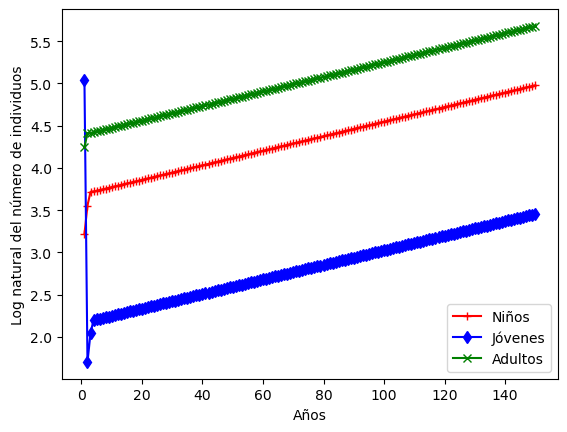

In [4]:
def C_Leslie_Graf(M, v, n_max):
    # Inicializar un array para almacenar la población en cada periodo.
    pp = np.zeros((n_max, len(v)))

    # Calcular la población para cada periodo y almacenarla en pp.
    for i in range(n_max):
        pp[i, :] = C_Leslie(M, v, i+1)

    # Tomar el logaritmo natural de los resultados.
    ee = np.log(pp)
    ee[ee < 0] = 0  # Reemplazar los valores negativos por 0.

    # Crear una secuencia de tiempos para el eje x.
    x = np.arange(1, n_max + 1)

    # Graficar los resultados para cada clase de edad.
    plt.plot(x, ee[:, 0], "r-+", label="Niños")
    plt.plot(x, ee[:, 1], "b-d", label="Jóvenes")
    plt.plot(x, ee[:, 2], "g-x", label="Adultos")

    # Añadir etiquetas y leyenda al gráfico.
    plt.xlabel("Años")
    plt.ylabel("Log natural del número de individuos")
    plt.legend()
    plt.show()

# Definir la matriz de Leslie y el vector de estado inicial.
M = np.array([
    [0, 0, 0.5],   
    [0.220, 0, 0],   
    [0, 0.08, 1]   
])
v = np.array([700, 250, 50]) 

# Ejecutar la función de graficación para ver la evolución de la población hasta el año 150.
C_Leslie_Graf(M, v, 150)


## Modelo de Lefkovitch

En este modelo lo que determina las características reproductivas y de supervivencia, son el tamaño y estado dentro del ciclo vital de los organismos Esta función grafica la evolución de la población en una escala semilogarítmica. Aquí vamos a empezar con una matriz de transición donde la primera fila muestra la tasa de reproducción al igual que en la de leslie, en la diagonal principal están las probabilidades de supervivencia, en la diagonal inferior la transición de etapa. Donde F es la tasa de reproducción, P es la probabilidad de permanecer en la misma etapa y b la probabilidad de transitar de clase. Esto se ve en la siguiente matriz:

$$
M = \begin{pmatrix}
P_1 & F_2 & F_3 & F_4 & F_5 & F_6 \\
b_1 & P_2 & 0 & 0 & 0 & 0 \\
0 & b_2 & P_3 & 0 & 0 & 0 \\
0 & 0 & b_3 & P_4 & 0 & 0 \\
0 & 0 & 0 & b_4 & P_5 & 0 \\
0 & 0 & 0 & 0 & b_5 & P_6
\end{pmatrix}
= \begin{pmatrix}
0.9 & 14.2 & 22.5 & 6.7 & 6.5 & 6.2 \\
0.02 & 0.4 & 0 & 0 & 0 & 0 \\
0 & 0.3 & 0.3 & 0 & 0 & 0 \\
0 & 0.04 & 0.2 & 0.3 & 0 & 0 \\
0 & 0 & 0 & 0.1 & 0.4 & 0.2 \\
0 & 0 & 0 & 0 & 0.3 & 0.5
\end{pmatrix}
$$

Para el vector inicial tenemos 500 individuos $200$ son de primera etapa , $100$ de segunda etapa, $80$ de tercera etapa, $60$ de cuarta etapa, $30$ de quinta etapa y $30$ de sexta etapa.

$$
v_0 = \begin{bmatrix}
200 \\
100 \\
80 \\
60 \\
30 \\
30 \\
\end{bmatrix}
$$


Esta función calcula la evolución de la población con una matriz de Lefkovitch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Lefkovitch(M, v, n):
    # Primera condición: Matriz cuadrada
    if M.shape[0] != M.shape[1]:
        print('La matriz no es cuadrada')
        return None

    # Segunda condición: Matriz y vector conformables
    if M.shape[1] != v.shape[0]:
        print('Matriz y vector no conformables')
        return None

    C = np.zeros_like(v, dtype=float)

    if n > 1:
        # Elevar la matriz de transición al tiempo n
        B = np.linalg.matrix_power(M, n)
        for j in range(len(M)):
            C[j] = 0
            for k in range(len(v)):
                # Multiplicar la matriz por el vector
                C[j] += B[j, k] * v[k]
    else:
        for j in range(len(M)):
            C[j] = 0
            for k in range(len(v)):
                C[j] += M[j, k] * v[k]
    
    return C

# Matriz de transición
M = np.array([
    [0.9, 14.2, 22.5, 6.7, 6.5, 6.25],
    [0.02, 0.4, 0, 0, 0, 0],
    [0, 0.3, 0.3, 0, 0, 0],
    [0, 0.04, 0.2, 0.3, 0, 0],
    [0, 0, 0, 0.1, 0.4, 0.2],
    [0, 0, 0, 0, 0.3, 0.5]
])

# Vector inicial
v = np.array([200, 100, 80, 60, 30, 30])

# Calcular vectores para diferentes tiempos
v1 = Lefkovitch(M, v, 1)
v5 = Lefkovitch(M, v, 5)
v10 = Lefkovitch(M, v, 10)
v15 = Lefkovitch(M, v, 15)

print("Distribución de la población en el año 1:", v1)
print("Distribución de la población en el año 5:", v5)
print("Distribución de la población en el año 10:", v10)
print("Distribución de la población en el año 15:", v15)


Distribución de la población en el año 1: [4184.5   44.    54.    38.    24.    24. ]
Distribución de la población en el año 5: [1.45302541e+04 3.05583766e+02 8.62268100e+01 2.71027280e+01
 8.32221200e+00 8.83150800e+00]
Distribución de la población en el año 10: [6.52518783e+04 1.37414878e+03 3.92617099e+02 1.27081363e+02
 1.52657052e+01 6.34420168e+00]
Distribución de la población en el año 15: [2.92123327e+05 6.15285735e+03 1.75869111e+03 5.69612147e+02
 6.49357291e+01 2.30817399e+01]


En este bloque se define la función para graficar la evolución de la población en diferentes etapas. Usando el modelo de Lefkovitch. 

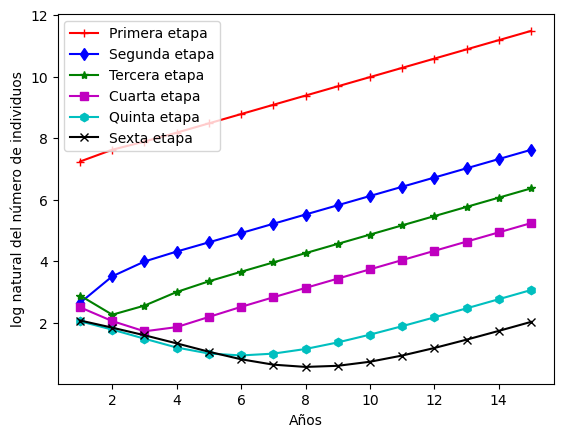

In [20]:
def LefkovGraf(M, v, x):
    pp = np.zeros((len(x), len(M)))

    for i in range(len(x)):
        pp[i, :] = Lefkovitch(M, v, i+1)

    ee = np.log(pp)
    ee[ee <= 0] = 0

    plt.plot(x, ee[:, 0], 'r+-', label="Primera etapa")
    plt.plot(x, ee[:, 1], 'bd-', label="Segunda etapa")
    plt.plot(x, ee[:, 2], 'g*-', label="Tercera etapa")
    plt.plot(x, ee[:, 3], 'ms-', label="Cuarta etapa")
    plt.plot(x, ee[:, 4], 'ch-', label="Quinta etapa")
    plt.plot(x, ee[:, 5], 'kx-', label="Sexta etapa")

    plt.xlabel("Años")
    plt.ylabel("log natural del número de individuos")
    plt.legend()
    plt.show()

# Tiempos
x = np.arange(1, 16)

# Graficar
LefkovGraf(M, v, x)


## Referencias

- **[@Leslie2020]**: Leslie, Matrices, October 8, 2020.
- **[@LeslieLefkovitch]**: Aplicación de los modelos poblacionales de Leslie y de Lefkovitch mediante GNU-Octave (PAPIME PE215519), FES Zaragoza.


